## Кластерный анализ регионов ##

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 85

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
# загружаем датасет, регион переводим сразу в индекс

work_clust = pd.read_excel('C:/00_Data/region_hierarchy_clustering.xlsx', sheet_name='data')

In [4]:
work_clust.head()

,region,№,ISOCode,country,tableauName,federal_district,region.1,non_state_stom_2020,nominal_salary_2020,private_salary_2020,stom_all_2020,%_private,%_all,clinic_number_all,clinic_number_private,population,square,private_for_pop,cluster_hierarchy
0,38.0,2.0,RU-SPE,Россия,Sankt-Peterburg,Северо-Западный ФО,Санкт-Петербург,21650.000000,79697.7,56531,43273,0.382976,0.271652,2551,2103,5384342,1.4,2560,6
1,15.0,2.0,RU-VLG,Россия,Vologda,Северо-Западный ФО,Вологодская область,35206.000000,48296.9,36527,46925,0.963835,0.728949,742,449,1151042,144.5,2564,3
2,46.0,3.0,RU-KDA,Россия,Krasnodar,Южный ФО,Краснодарский край,17535.000000,42822.5,31509,27035,0.556508,0.409481,3022,2200,5683947,75.5,2584,1
3,52.0,2.0,RU-NEN,Россия,Nenets,Северо-Западный ФО,Ненецкий АО,16430.565885,94099.7,87801,105781,0.187134,0.174608,39,17,44389,176.8,2611,6
4,57.0,8.0,RU-PRI,Россия,Primorsky,Дальневосточный ФО,Приморский край,14239.000000,58113.4,41943,54034,0.339485,0.245021,882,628,1877844,164.7,2990,2


In [5]:
work_clust.columns

Index(['region', '№', 'ISOCode', 'country', 'tableauName', 'federal_district',
       'region.1', 'non_state_stom_2020', 'nominal_salary_2020',
       'private_salary_2020', 'stom_all_2020', '%_private', '%_all',
       'clinic_number_all', 'clinic_number_private', 'population', 'square',
       'private_for_pop', 'cluster_hierarchy'],
      dtype='object')

In [23]:
# отбираем нужные столбцы для анализа

need_columns = [
    'non_state_stom_2020',
    #'private_salary_2020',
    'private_for_pop',
    'nominal_salary_2020'
]

### Иерархический кластерный анализ ###

In [24]:
# Нормализуем данные

data_normed = preprocessing.MinMaxScaler().fit_transform(work_clust[need_columns].values)

In [25]:
data_normed[:3]

array([[2.67683824e-01, 0.00000000e+00, 5.19833829e-01],
       [4.35292227e-01, 2.84272617e-04, 1.82237283e-01],
       [2.16805351e-01, 1.70563570e-03, 1.23380868e-01]])

In [26]:
# Вычисляем расстояния между данными (строками массива data_for_clust)
# по умолчанию евклидово расстояние

data_dist = pdist(data_normed, 'euclidean')

In [27]:
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров


link = linkage(data_dist, method='ward')

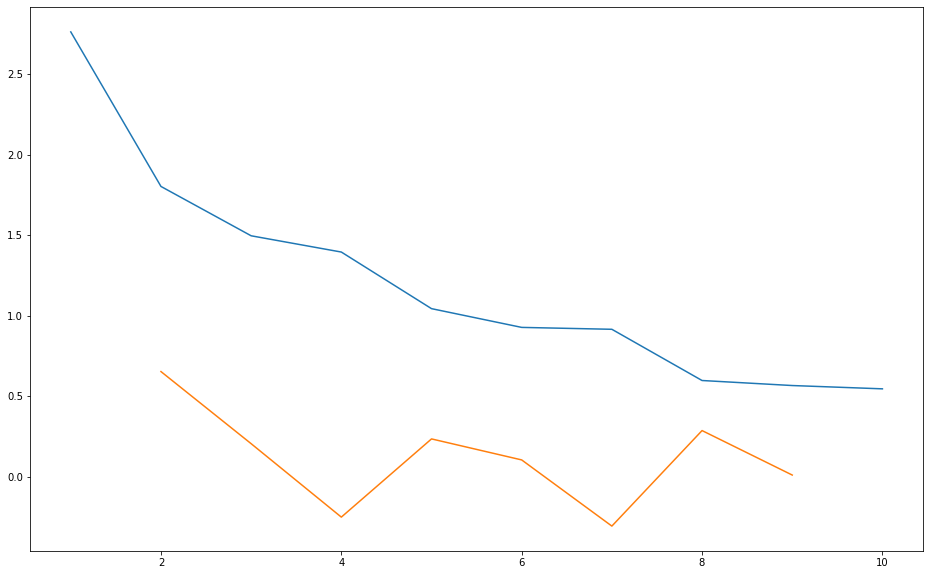

Рекомендованное количество кластеров: 2


In [28]:
plt.rcParams['figure.figsize']=(16, 10)

last = link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

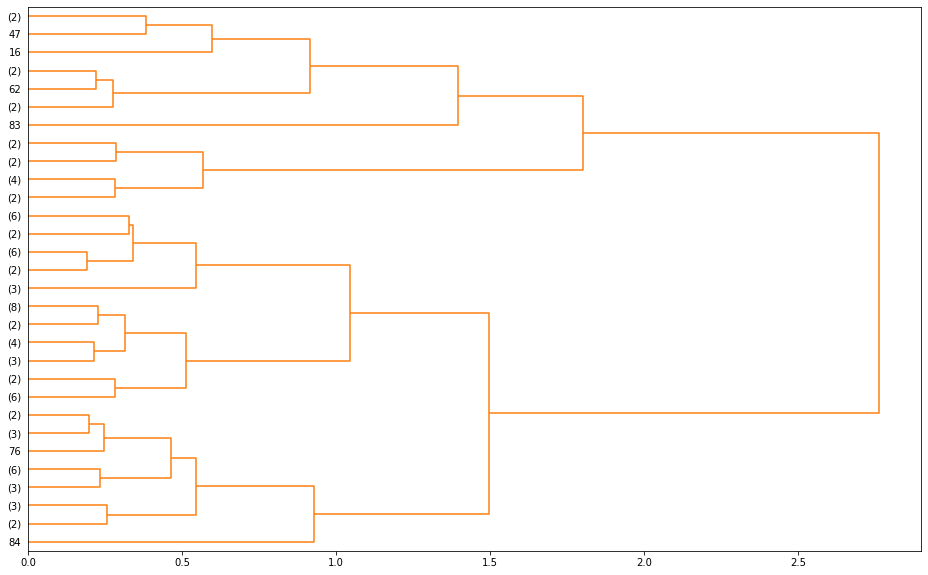

In [29]:
# строим дендрограмму 

dn = dendrogram(link,
                # массив с названиями объектов для подписи по оси X
                labels = work_clust.index.tolist(),
                
                # опция для более красивого отображения слишком ветвистой дендрограммы
                truncate_mode = 'lastp',
                
                # повернуть подписи вертикально
                color_threshold = 5,
                orientation = 'right',
                leaf_rotation=0.)

In [30]:
# Задаем количество кластеров

n_clusts = 6

In [31]:
# иерархическая кластеризация

clusters = fcluster(link, n_clusts, criterion='maxclust')

clusters

array([5, 3, 2, 5, 3, 2, 3, 5, 4, 5, 3, 2, 3, 2, 4, 4, 5, 3, 2, 3, 5, 2,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 4, 2, 4, 3, 4, 2, 2, 2, 3, 5, 2, 2,
       3, 2, 2, 5, 2, 4, 3, 2, 2, 3, 2, 2, 4, 2, 3, 1, 4, 1, 5, 1, 1, 1,
       4, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1],
      dtype=int32)

In [32]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

0: non_state_stom_2020
1: private_for_pop
2: nominal_salary_2020


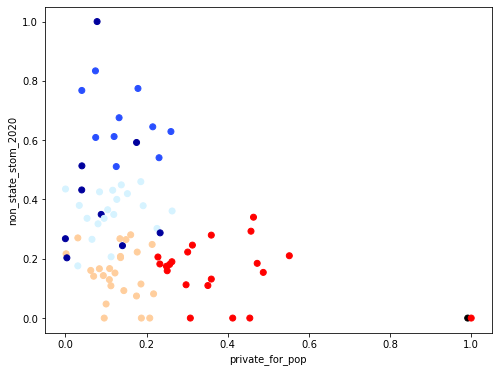

In [33]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов

x = 1
y = 0

plt.figure(figsize=(8, 6))

plt.scatter(data_normed[:,x], data_normed[:,y], c=clusters, cmap='flag')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [34]:
# добавляем номер кластера

work_clust['cluster_hierarchy'] = clusters

In [35]:
# группируем

res_hierarchy = work_clust.groupby('cluster_hierarchy')[need_columns].mean()

res_hierarchy['Объектов в кластере'] = work_clust.groupby('cluster_hierarchy').size().values

In [36]:
# средние цифры по кластерам и количество объектов

res_hierarchy

,non_state_stom_2020,private_for_pop,nominal_salary_2020,Объектов в кластере
cluster_hierarchy,,,,
1,13007.694861,7966.619048,37391.885714,21
2,12175.107201,4368.880000,39799.456000,25
3,28934.894737,4174.157895,47741.473684,19
4,53369.700000,4602.600000,54239.070000,10
5,34955.285098,3811.111111,98133.233333,9
6,0.000000,16509.000000,124359.300000,1


In [37]:
# состав кластеров

work_clust[work_clust['cluster_hierarchy'] == 4][need_columns]

,non_state_stom_2020,private_for_pop,nominal_salary_2020
8,62088.0,3129,63559.2
14,67432.0,3602,45515.2
15,49262.0,3610,72661.0
32,49514.0,4249,61258.7
34,41327.0,4323,63010.2
36,54651.0,4422,59868.6
49,62633.0,5076,36236.9
56,52170.0,5589,39895.3
60,43740.0,5807,56363.6
66,50880.0,6219,44022.0


### K-means ###

In [ ]:
# строим кластеризаци методом KMeans

km = KMeans(n_clusters=n_clusts).fit(data_normed)

In [ ]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1

km.labels_ +1

In [ ]:
# номера столбцов

for i in enumerate(need_columns):
    print(i[0], ': ', i[1], sep='')

In [ ]:
# Чтобы построить диаграмму в разных осях, меняйте номера столбцов
# звездочки центры кластеров

x = 0
y = 2

centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(data_normed[:,x], data_normed[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='r', label='centroid')
plt.xlabel(need_columns[x])
plt.ylabel(need_columns[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номера кластеров

work_clust['cluster_KMeans'] = km.labels_+1

In [ ]:
# группируем

res_KMeans = work_clust.groupby('cluster_KMeans')[need_columns].mean()
res_KMeans['объектов в KM'] = work_clust.groupby('cluster_KMeans').size().values

In [ ]:
# средние цифры по кластерам и количество объектов

res_KMeans

In [ ]:
# состав кластеров

work_clust[work_clust['cluster_KMeans'] == 1][need_columns]

In [38]:
# возвращаем города в столбец city

region_clust_res = (work_clust
                   .rename_axis('index').reset_index()
                   .rename(columns={'index': 'region'})
                  )

In [39]:
region_clust_res.to_excel('C:/00_Data/region_hierarchy_clustering1.xlsx',
    encoding='utf-8', index=False)

In [ ]:
#res_hierarchy.to_excel('C:/00_Projects/Lenin/Datasets/04_work_data/res_region_hierarchy.xlsx',
#    encoding='utf-8', index=False)